In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
Response_data = pd.read_csv("C:\\Users\\dappi\\Downloads\\Retail_Data_Response.csv")
Response_data

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [3]:
Response_data.columns

Index(['customer_id', 'response'], dtype='object')

In [4]:
Transaction_data= pd.read_csv("C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\Retail_Data_Transactions.csv")
Transaction_data

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
df=Transaction_data.merge(Response_data, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [6]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [7]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [8]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
df.describe(include='all')

,customer_id,trans_date,tran_amount,response
count,125000,125000,125000.000000,124969.000000
unique,6889,1401,NaN,NaN
top,CS4424,16-Jul-11,NaN,NaN
freq,39,141,NaN,NaN
mean,NaN,NaN,64.991912,0.110763
std,NaN,NaN,22.860006,0.313840
min,NaN,NaN,10.000000,0.000000
25%,NaN,NaN,47.000000,0.000000
50%,NaN,NaN,65.000000,0.000000
75%,NaN,NaN,83.000000,0.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [11]:
# Missing_Values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [12]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

customer_id    0.0000
trans_date     0.0000
tran_amount    0.0000
response       0.0248
dtype: float64

In [13]:
# There are 0.0248 Null values in response colum. so, if we drop that null values the data may no effect.
DF=df.dropna()

In [14]:
DF

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [15]:
# Checking missing values
DF.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
response       0
dtype: int64

In [16]:
# Changing data_type
DF['trans_date']=pd.to_datetime(DF['trans_date'])
DF['response']=DF['response'].astype('int64')

C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\3251857100.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF['trans_date']=pd.to_datetime(DF['trans_date'])
C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\3251857100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['trans_date']=pd.to_datetime(DF['trans_date'])
C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\3251857100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [18]:
DF

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [19]:
#checking datatype
DF.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [20]:
### Checking outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df['tran_amount']))
threshold = 3
outliers = z_scores>threshold
print(DF[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\424663479.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(DF[outliers])


In [21]:
z_scores = np.abs(stats.zscore(df['response']))
threshold = 3
outliers = z_scores>threshold
print(DF[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\3882335603.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(DF[outliers])


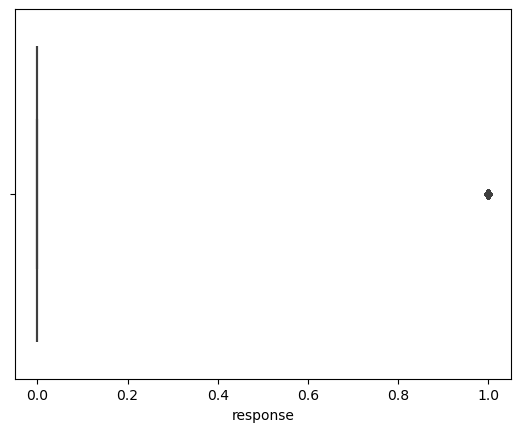

In [22]:
## checking outliers through chats
sbn.boxplot(x=DF['response'])
plt.show()

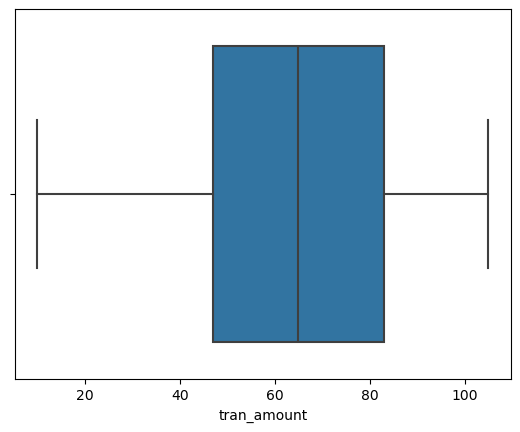

In [23]:
sbn.boxplot(x=DF['tran_amount'])
plt.show()

In [24]:
# creating new columns as month
DF['Month'] = DF['trans_date'].dt.month

C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\1162664805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Month'] = DF['trans_date'].dt.month


In [25]:
DF

,customer_id,trans_date,tran_amount,response,Month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [26]:
# which three months have had the highest transaction amounts?
Top_months= DF.groupby('Month')['tran_amount'].sum()
Top_months

Month
1     724089
2     645028
3     636475
4     515746
5     633162
6     697014
7     717011
8     726775
9     694201
10    725058
11    698024
12    709795
Name: tran_amount, dtype: int64

In [27]:
# we need to sort the record to get top three months
Top_months=Top_months.sort_values(ascending=False).reset_index().head(3)
Top_months

,Month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [28]:
# Customer having higgest num of orders
Top_ordered_customers = DF.groupby('customer_id')['trans_date'].count()
Top_ordered_customers = Top_ordered_customers.sort_values(ascending=False).reset_index().head(5)
Top_ordered_customers

,customer_id,trans_date
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
4,CS2620,35


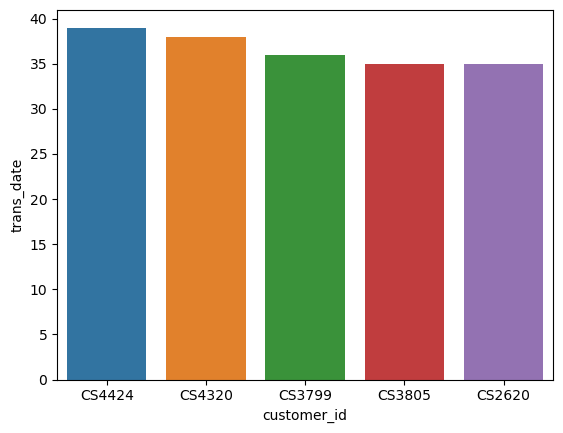

In [29]:
sbn.barplot(x='customer_id',y='trans_date',data=Top_ordered_customers)
plt.show()

In [30]:
# Customers having higest value of order
cstmr_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
cstmr_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [31]:
# sorting in order
cstmr_sales=cstmr_sales.sort_values(by='tran_amount',ascending=False).head(5)
cstmr_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


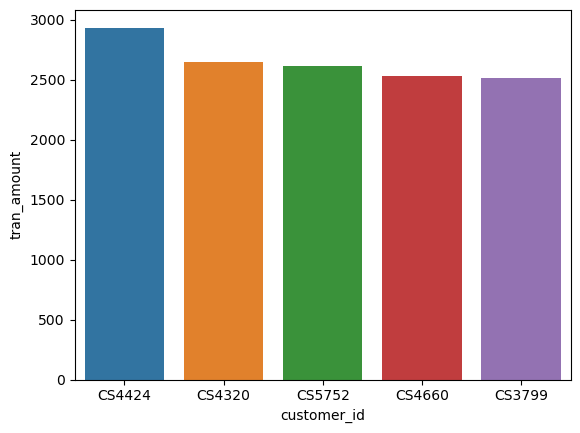

In [32]:
sbn.barplot(x='customer_id',y='tran_amount',data=cstmr_sales)
plt.show()

# Advance Analytics

1.Time Series Analysis

In [37]:
import matplotlib.dates as mdates
DF['month_year'] = DF['trans_date'].dt.to_period('M')

C:\Users\dappi\AppData\Local\Temp\ipykernel_6492\3642240176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['month_year'] = DF['trans_date'].dt.to_period('M')


In [38]:
DF

,customer_id,trans_date,tran_amount,response,Month,monthyear,month_year
0,CS5295,2013-02-11,35,1,2,2013-02,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11,2013-11
...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12,2013-12


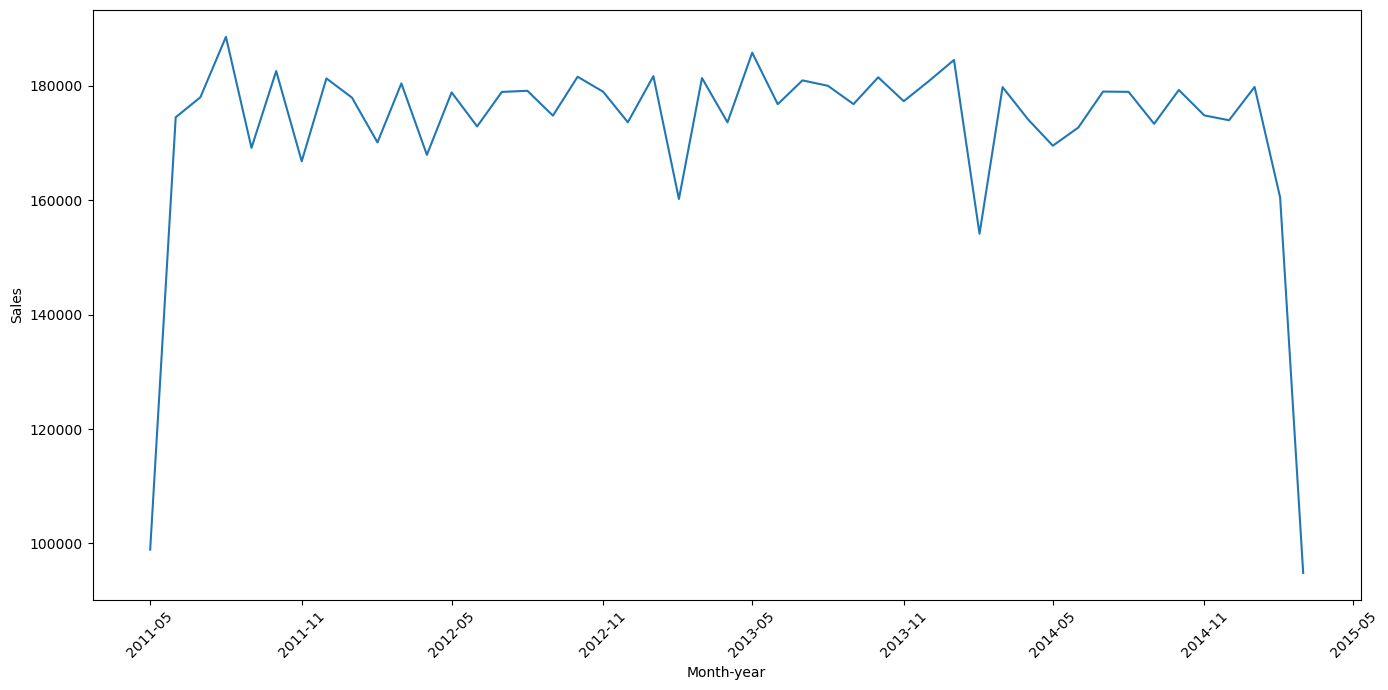

In [42]:
monthly_sales = DF.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,7))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()


### Cohort Segmentation

In [51]:
# Recency
recency = DF.groupby('customer_id')['trans_date'].max()

# frequency 
frequency = DF.groupby('customer_id')['trans_date'].count()

# monetary
monetary = DF.groupby('customer_id')['tran_amount'].sum()

# combining all above there in one dataframe

rfm = pd.DataFrame({'recency':recency, 'frequency':frequency,'monetary':monetary})


In [52]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [53]:
# customer segementation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['segment'] = rfm.apply(segment_customer,axis=1) 


In [54]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### Churn Analysis

<Axes: xlabel='response'>

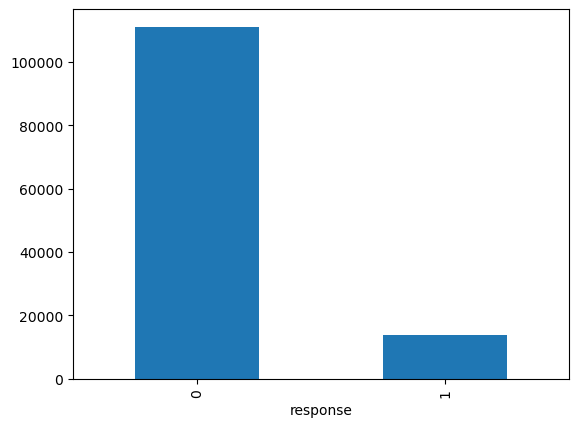

In [56]:
# Count the number of churned and active customers
churn_counts= DF['response'].value_counts()
churn_counts.plot(kind= 'bar')                      #response of product by customer

### Analysing top 5 customers

<Axes: xlabel='month_year'>

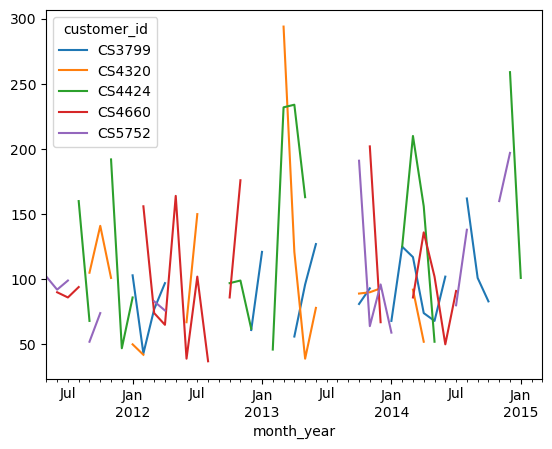

In [58]:
top_5_cus=monetary.sort_values(ascending = False).head(5).index
top_cus_DF=DF[DF['customer_id'].isin(top_5_cus)]
top_customer_sales = top_cus_DF.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')


In [59]:
rfm.to_csv('rfm_dataset.csv')

In [60]:
DF.to_csv('Main_dataset.csv')